<a href="https://colab.research.google.com/github/grvtgpt/IDS-Project/blob/main/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default of Credit Card Clients Data Set 


## Importing libraries

In [101]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import os.path
import random 

## Downloading Dataset and importing it as a Pandas Dataframe

In [102]:
 !wget https://gist.githubusercontent.com/grvtgpt/6394d6ad1e3430b7173ca0762d03e461/raw/aa99e020f1816a31197ed6edfd75d0aa211b6fa8/Credit.csv
dataset = pd.read_csv("Credit.csv");
print(dataset)

--2020-11-25 17:52:44--  https://gist.githubusercontent.com/grvtgpt/6394d6ad1e3430b7173ca0762d03e461/raw/aa99e020f1816a31197ed6edfd75d0aa211b6fa8/Credit.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 921597 (900K) [text/plain]
Saving to: ‘Credit.csv.3’

Credit.csv.3        100%[===================>] 900.00K  --.-KB/s    in 0.04s   

2020-11-25 17:52:45 (20.6 MB/s) - ‘Credit.csv.3’ saved [921597/921597]

        ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0        1    20000.0  2.0  ...       0.0       0.0                         1.0
1        2   120000.0  2.0  ...       0.0    2000.0                         1.0
2        3    90000.0  2.0  ...    1000.0    5000.0                         0.0
3        4    50000.0  2.0  ...    10

## Info

In [103]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9755 entries, 0 to 9754
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          9755 non-null   int64  
 1   LIMIT_BAL                   9754 non-null   float64
 2   SEX                         9754 non-null   float64
 3   EDUCATION                   9754 non-null   float64
 4   MARRIAGE                    9754 non-null   float64
 5   AGE                         9754 non-null   float64
 6   PAY_0                       9754 non-null   float64
 7   PAY_2                       9754 non-null   float64
 8   PAY_3                       9754 non-null   float64
 9   PAY_4                       9754 non-null   float64
 10  PAY_5                       9754 non-null   float64
 11  PAY_6                       9754 non-null   float64
 12  BILL_AMT1                   9754 non-null   float64
 13  BILL_AMT2                   9754 

## Checking for Null Values

In [104]:
dataset.isna().sum()

ID                            0
LIMIT_BAL                     1
SEX                           1
EDUCATION                     1
MARRIAGE                      1
AGE                           1
PAY_0                         1
PAY_2                         1
PAY_3                         1
PAY_4                         1
PAY_5                         1
PAY_6                         1
BILL_AMT1                     1
BILL_AMT2                     1
BILL_AMT3                     1
BILL_AMT4                     1
BILL_AMT5                     1
BILL_AMT6                     1
PAY_AMT1                      1
PAY_AMT2                      1
PAY_AMT3                      1
PAY_AMT4                      1
PAY_AMT5                      1
PAY_AMT6                      1
default payment next month    1
dtype: int64

## Dropping Unwanted Column and Null Rows

In [106]:
dataset = dataset.drop('ID', 1) #removing unwanted column
dataset = dataset.drop(9754 , ) #removing Null Row
x = dataset.iloc[: , :-1].values
y = dataset.iloc[: ,-1:].values


## Description

### Description of the data

In [107]:
dataset.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000,9.754000e+03,9754.000000,9754.000000,9754.000000,9754.000000,9.754000e+03,9754.000000,9754.000000,9754.000000,9754.000000,9754.000000
mean,166012.507689,1.578224,1.817203,1.571150,35.372668,0.003998,-0.141788,-0.156141,-0.238876,-0.252819,-0.282243,49952.570740,48036.409063,4.535391e+04,40510.532499,39265.477138,37752.267685,5624.287267,5.793693e+03,4544.911729,4703.284294,4855.631741,5334.323457,0.225446
std,130382.013887,0.493868,0.766565,0.523333,9.314351,1.124234,1.204545,1.220455,1.139479,1.130950,1.157981,72078.220482,69931.429674,6.805720e+04,61308.887406,59421.723365,59061.580378,15568.683710,2.417941e+04,16159.891606,14703.070568,15337.027846,18665.140154,0.417897
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-15308.000000,-33350.000000,-3.404100e+04,-170000.000000,-28335.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3392.000000,2919.500000,2.500000e+03,2000.000000,1520.250000,980.000000,958.500000,6.502500e+02,285.000000,222.000000,200.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21992.000000,21013.000000,1.974400e+04,18492.000000,17762.500000,16402.500000,2100.000000,2.000000e+03,1494.500000,1500.000000,1500.000000,1352.500000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64593.500000,62078.250000,5.784675e+04,49666.250000,49423.500000,48144.750000,5004.750000,5.000000e+03,4000.000000,4000.000000,4056.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,405016.000000,1.684259e+06,896040.000000,497000.000000,379267.000000,528666.000000,1.000000


### Correlation Matrix for the Dataset

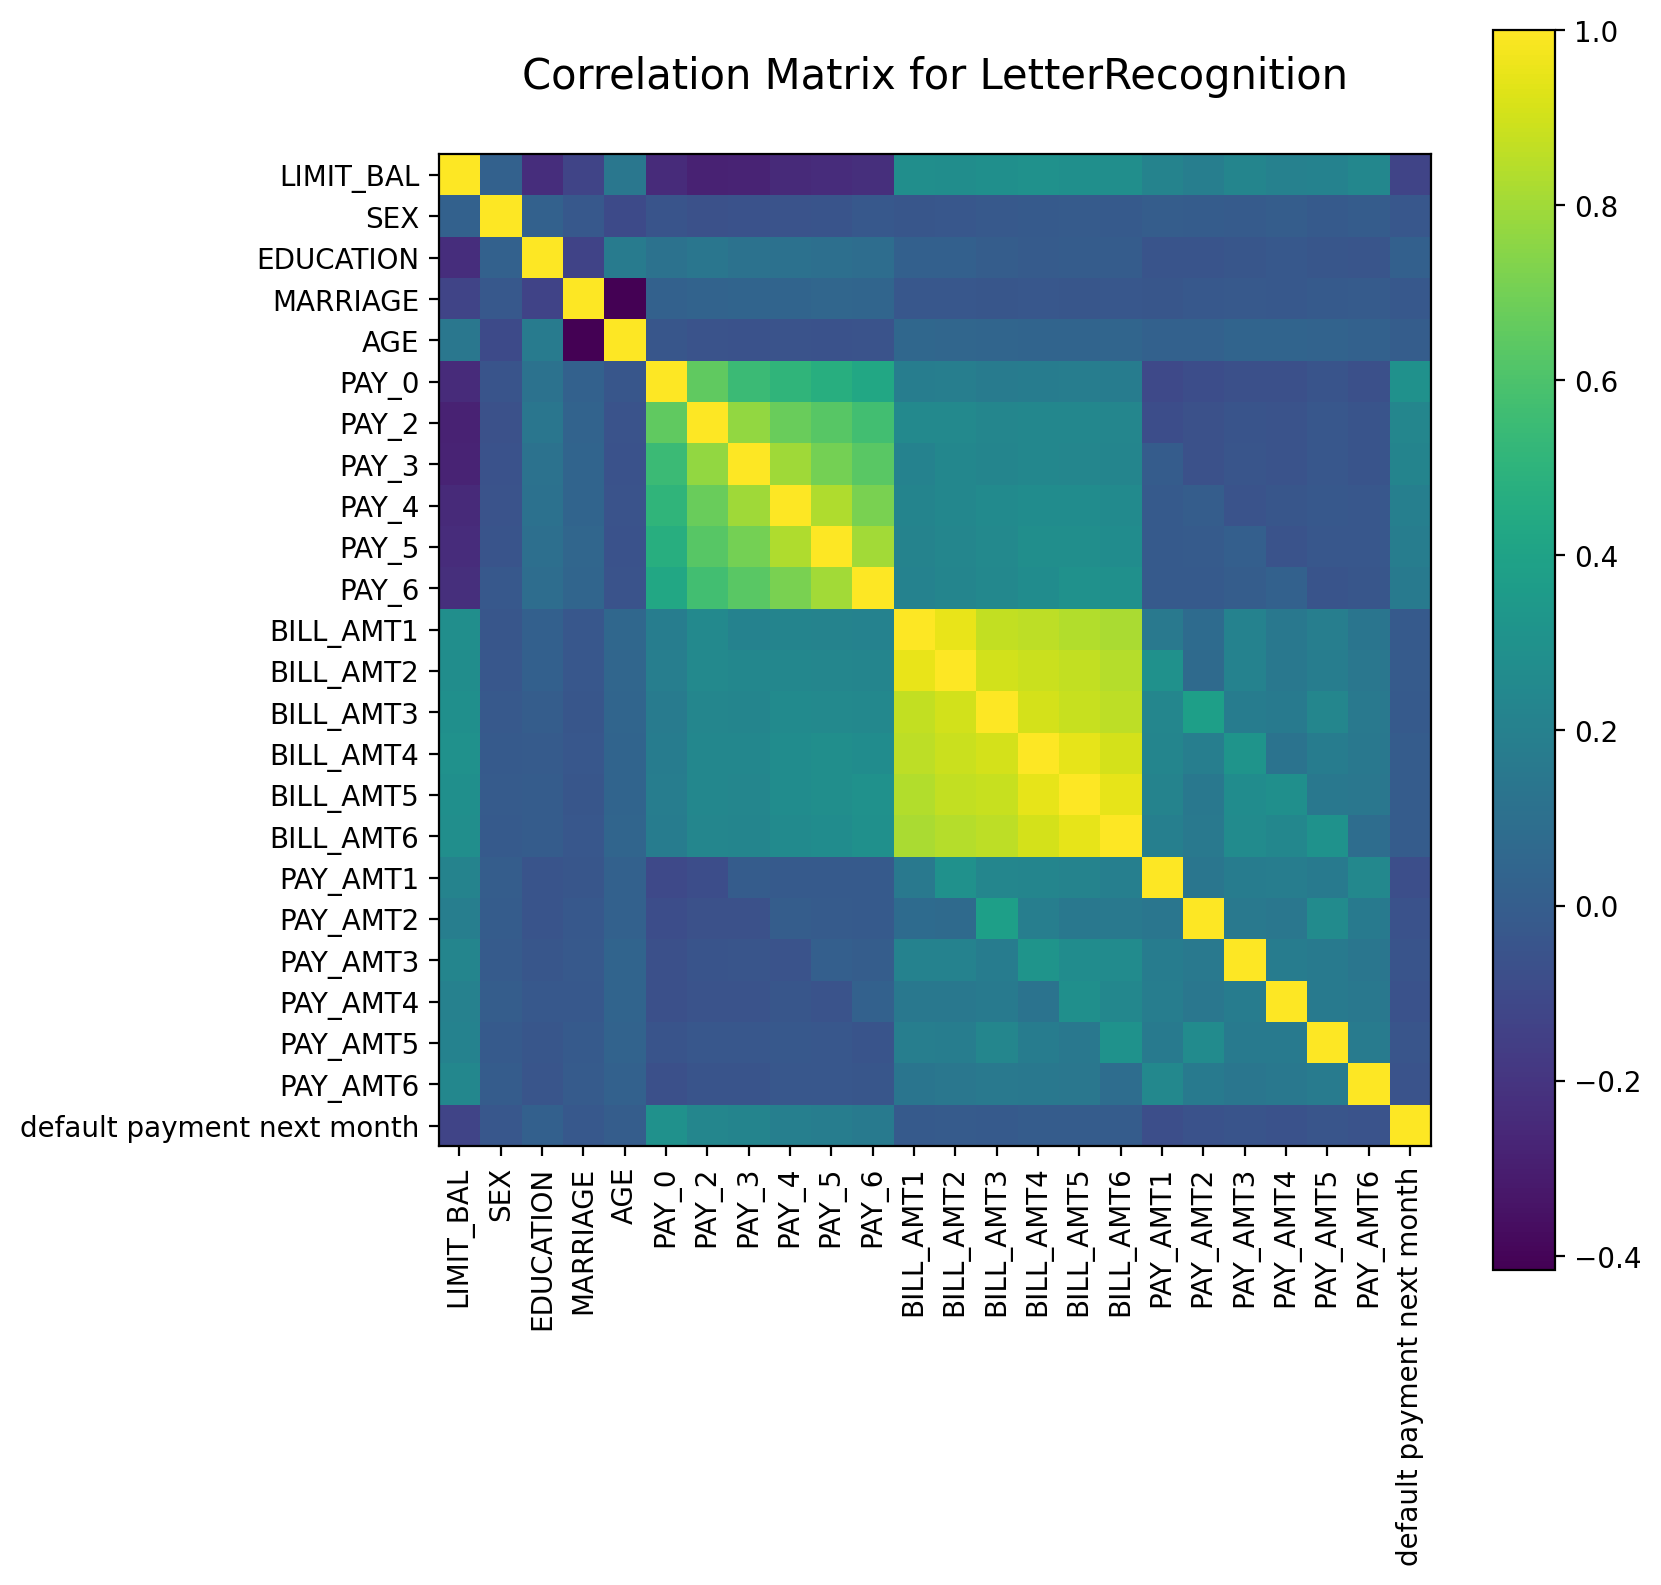

In [108]:
def plotCorrelationMatrix(df, graphWidth):
    filename = "LetterRecognition"
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=200, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

plotCorrelationMatrix(dataset, 8)

### Distribution graph of sampled Columns

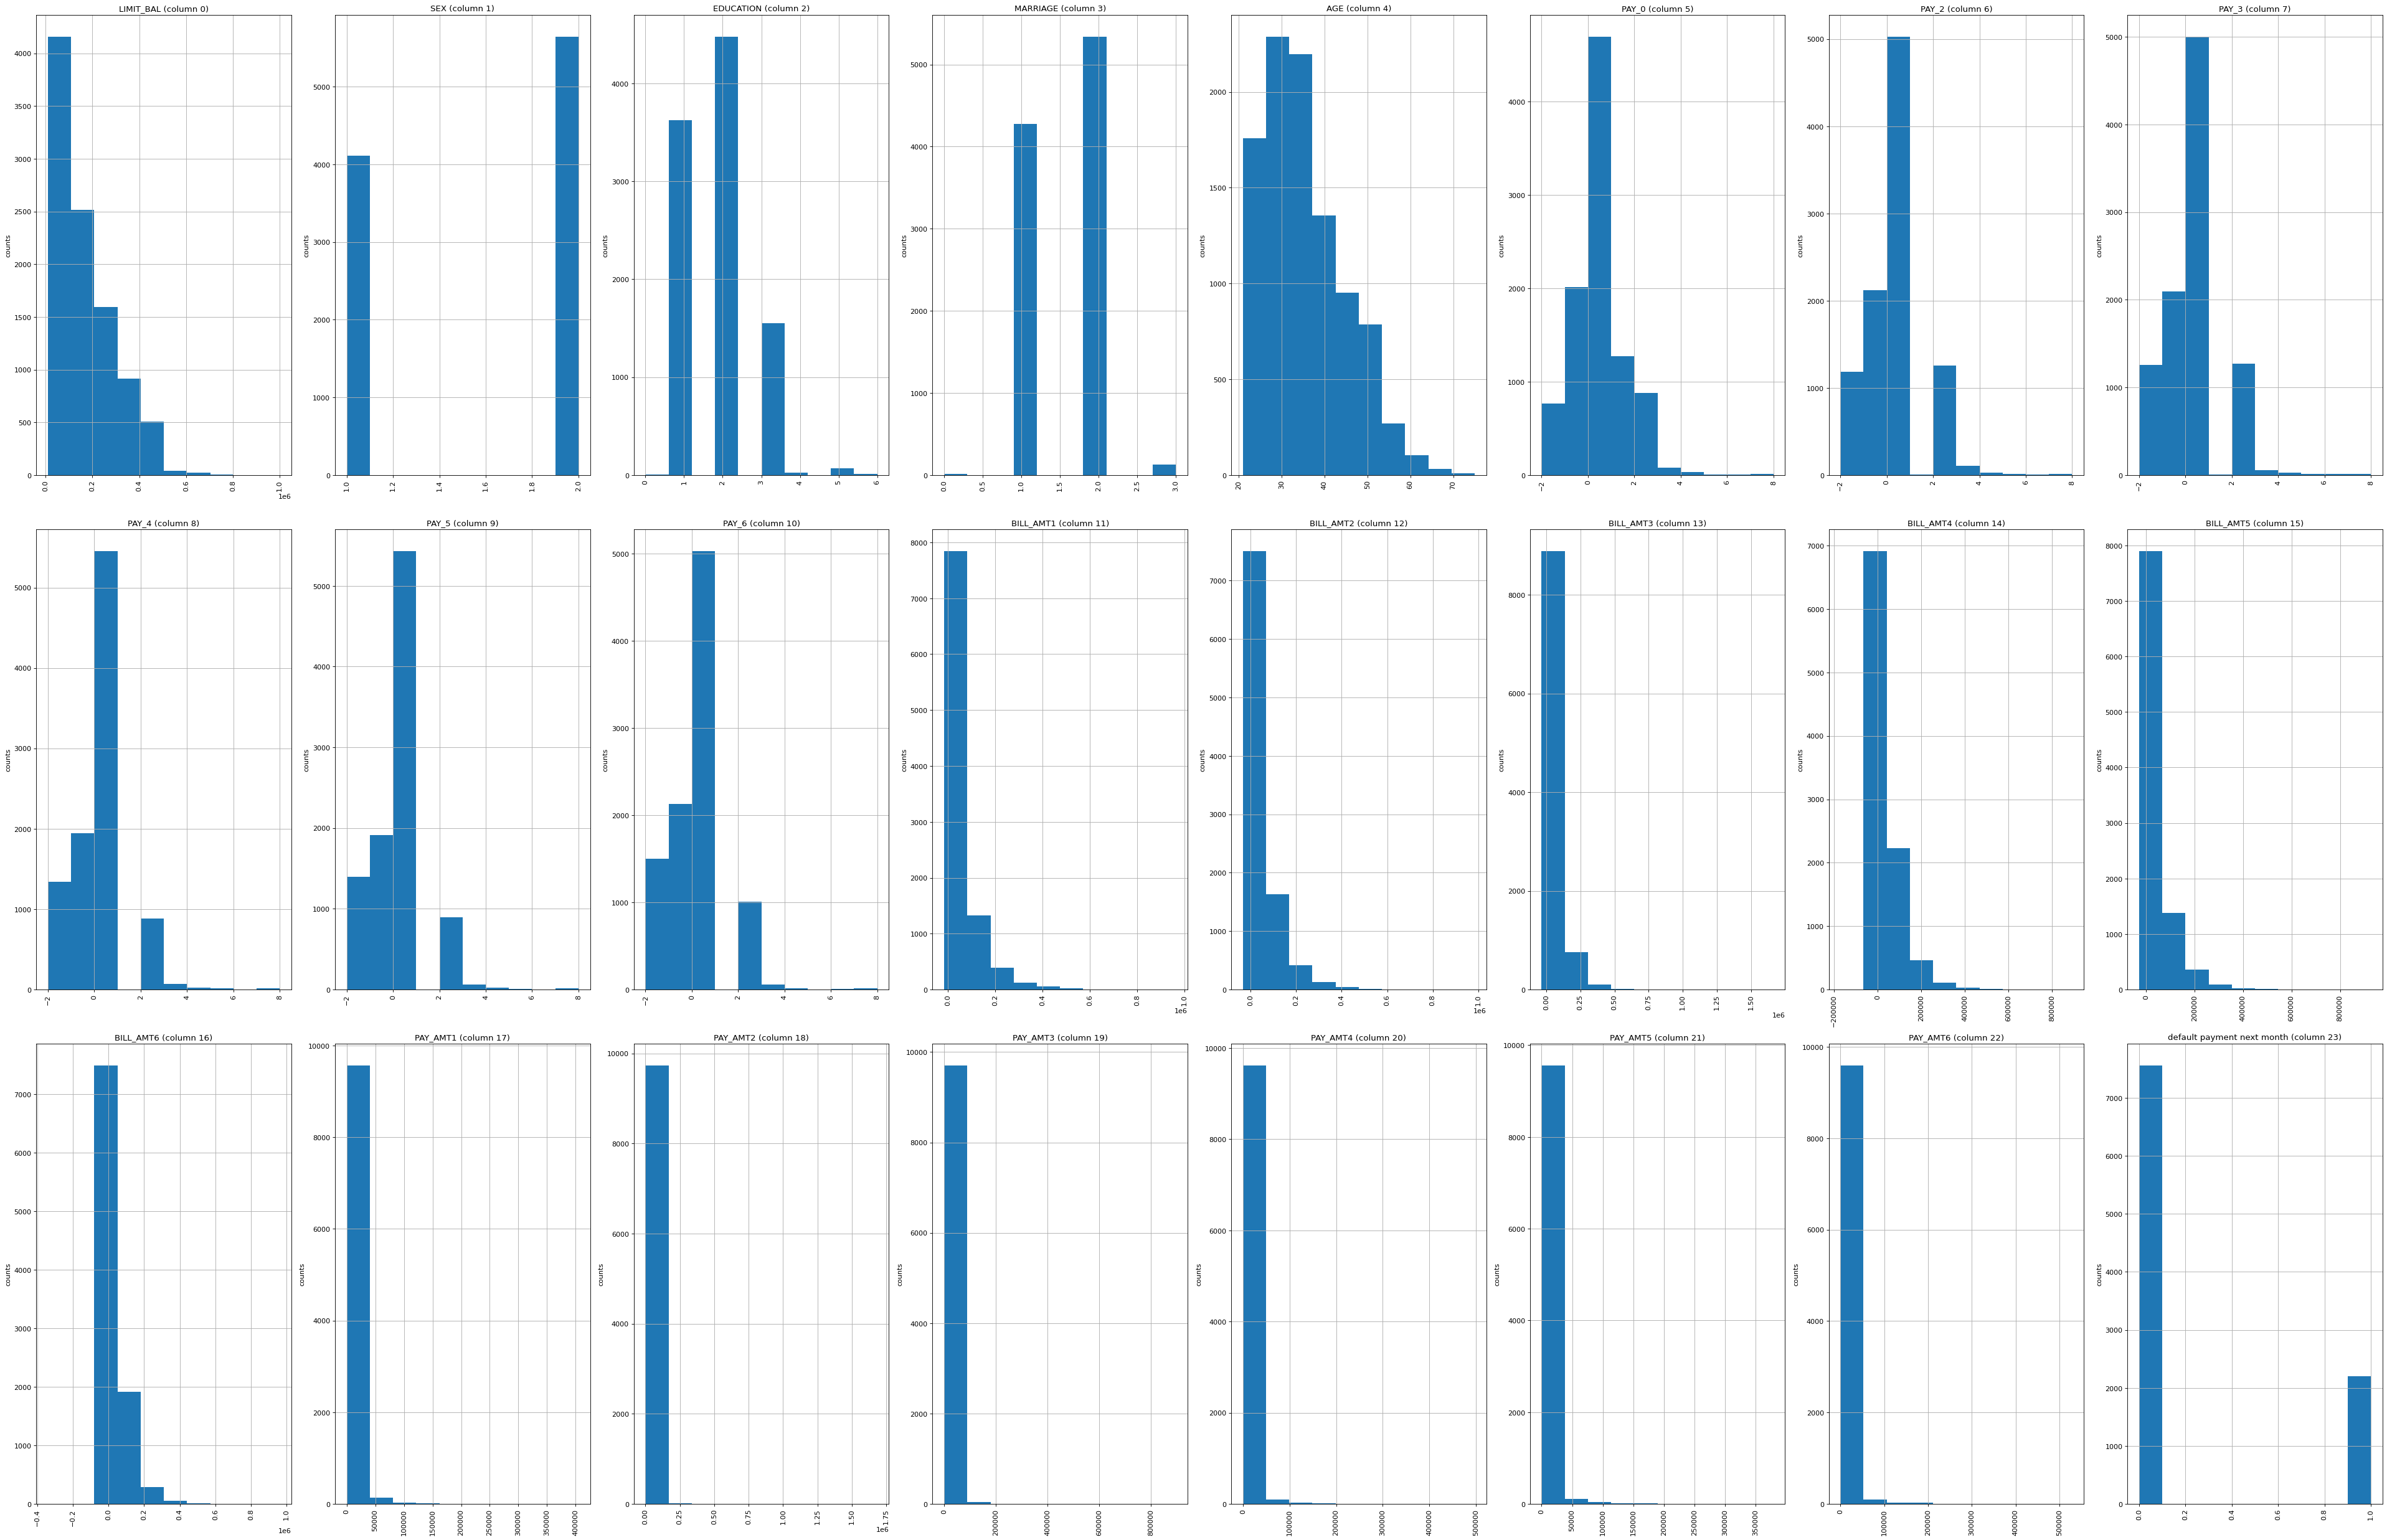

In [109]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(dataset, 32, 8)

### Splitting into Test and Train

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state =0 )

### Fitting Logistic Regression and Saving Model

In [111]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
if not os.path.exists("models/"):
  !mkdir models
joblib.dump(classifier, 'models/logistic.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


['models/logistic.pkl']

### Fitting SVM and Saving Model


In [112]:
parameters = [{'C':[1, 10, 100, 1000], 'gamma': [ 0.1, 0.2,0.3, 0.5]}]
grid_search = GridSearchCV(SVC(kernel='rbf' ),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

classifier = SVC(C=1000, kernel = 'rbf', gamma = 0.2 , random_state = 10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/svm.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['models/svm.pkl']

### Fitting Random Forest and Saving Model

In [113]:
parameters = [{'n_estimators': [100, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']}]

grid_search = GridSearchCV(RandomForestClassifier(),  parameters,cv =5, n_jobs= -1)
grid_search.fit(x_train, y_train)

classifier = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_features = 'log2',  random_state = 10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/rf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


['models/rf.pkl']

### Fitting Adaboost and Saving Model


In [114]:
classifier = AdaBoostClassifier(n_estimators=100, random_state=10)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/ada.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['models/ada.pkl']

### Adding KNN and Saving Model


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.2896 0.3228 0.3159 0.3553 0.3453 0.3859 0.36   0.3961 0.3559 0.3978
 0.3677 0.4362 0.4051 0.4669 0.4232 0.5086 0.4674 0.4961 0.4564 0.4587
 0.4444 0.4832 0.4478 0.4953]


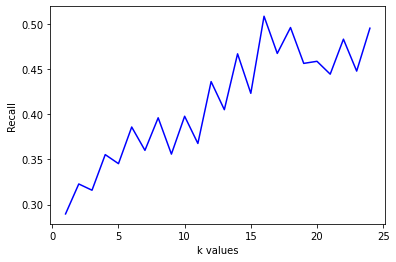

Selected value of K:  16


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


['models/knn.pkl']

In [115]:
knn=KNeighborsClassifier()
k_range=list(range(1,25))
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn, x_train,y_train,cv=10,scoring='precision')
  k_scores.append(scores.mean())
print(np.round(k_scores,4))
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

num_neighbour = 1
temp=0.0
for i in range(3,25):
  if(k_scores[i-1]>temp):
    temp=k_scores[i-1]
    num_neighbour = i

print("Selected value of K: ",num_neighbour)

classifier = KNeighborsClassifier(n_neighbors=num_neighbour)
classifier.fit(x_train, y_train)

joblib.dump(classifier, 'models/knn.pkl')

### Importing Models and making Predictions

In [118]:
Random_forest_model = joblib.load("models/rf.pkl")
Logistic_Regression_Model = joblib.load("models/logistic.pkl")
SVM_model = joblib.load("models/svm.pkl")
ADA_model = joblib.load("models/ada.pkl")
KNN_model = joblib.load("models/knn.pkl")

rf_predicted = Random_forest_model.predict(x_test)
lr_predicted = Logistic_Regression_Model.predict(x_test)
SVM_predicted = SVM_model.predict(x_test)
ADA_predicted = ADA_model.predict(x_test)
KNN_predicted = KNN_model.predict(x_test)

### Printing Confusion Matrixes

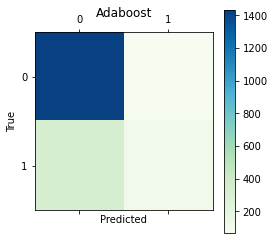

Accuracy Achieved for Adaboost:  79.6514607893388  %
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      1505
         1.0       0.63      0.26      0.37       446

    accuracy                           0.80      1951
   macro avg       0.72      0.61      0.63      1951
weighted avg       0.77      0.80      0.76      1951




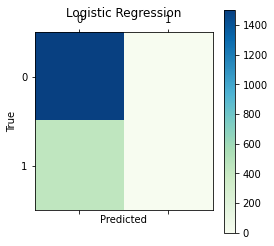

Accuracy Achieved for Logistic Regression:  77.19118400820092  %
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1505
         1.0       1.00      0.00      0.00       446

    accuracy                           0.77      1951
   macro avg       0.89      0.50      0.44      1951
weighted avg       0.82      0.77      0.67      1951




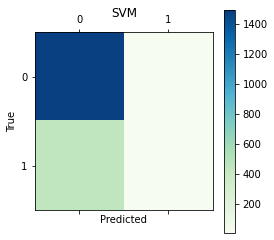

Accuracy Achieved for SVM:  77.13992824192721  %
              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87      1505
         1.0       0.50      0.02      0.03       446

    accuracy                           0.77      1951
   macro avg       0.64      0.51      0.45      1951
weighted avg       0.71      0.77      0.68      1951




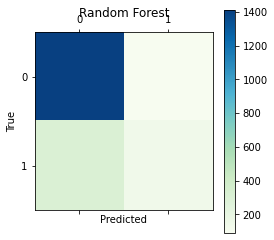

Accuracy Achieved for Random Forest:  79.75397232188621  %
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      1505
         1.0       0.61      0.32      0.42       446

    accuracy                           0.80      1951
   macro avg       0.72      0.63      0.65      1951
weighted avg       0.77      0.80      0.77      1951




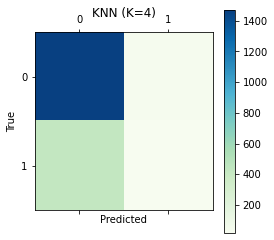

Accuracy Achieved for KNN (K=4):  76.42234751409534  %
              precision    recall  f1-score   support

         0.0       0.78      0.98      0.86      1505
         1.0       0.37      0.04      0.08       446

    accuracy                           0.76      1951
   macro avg       0.57      0.51      0.47      1951
weighted avg       0.68      0.76      0.68      1951




In [119]:
def display_confussion(name,y_pred):
  c_m = confusion_matrix(y_test, y_pred)
  ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
  plt.colorbar(ax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(name)
  plt.show()
  print("Accuracy Achieved for " +name+ ": ",((c_m[0][0]+c_m[1][1])/(c_m[0][0]+c_m[0][1]+c_m[1][0]+c_m[1][1]))*100," %" )
  print(classification_report(y_test,y_pred))
  print()

display_confussion("Adaboost",ADA_predicted)
display_confussion("Logistic Regression", lr_predicted)
display_confussion("SVM", SVM_predicted)
display_confussion("Random Forest", rf_predicted)
display_confussion("KNN (K=4)", KNN_predicted)